In [1]:
import os, random, cv2
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import json 
import io 
import tensorflow as tf 

from tensorflow import keras

In [2]:
train_data_dir = r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\train aug"



In [3]:
import pathlib
train_data_dir = pathlib.Path(r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\train aug")

class_names = np.array(sorted([item.name for item in train_data_dir.glob("*")]))

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagenerator = ImageDataGenerator(rescale=1./255,
                                         rotation_range=0.2,
                                         shear_range=0.2,
                                         zoom_range=0.2,
                                         width_shift_range=0.2,
                                         height_shift_range=0.2,
                                         horizontal_flip=True,
                                         validation_split=0.1)


train_data = ImageDataGenerator(rescale=1./255,
                                validation_split=0.1)

In [5]:
train_datagen_augmented = train_datagenerator.flow_from_directory(train_data_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode="categorical",
                                                        seed=42,
                                                        subset="training")


valid_datagen = train_datagenerator.flow_from_directory(train_data_dir,
                                                        target_size=(224, 224),
                                                        batch_size=32,
                                                        shuffle=True,
                                                        class_mode="categorical",
                                                        seed=42,
                                                        subset="validation")

Found 9720 images belonging to 4 classes.
Found 1080 images belonging to 4 classes.


In [6]:
train_datagen = train_data.flow_from_directory(train_data_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               shuffle=True,
                                               seed=42,
                                               class_mode="categorical",
                                               subset="training"
                                               )



Found 9720 images belonging to 4 classes.


Showing image number: 18


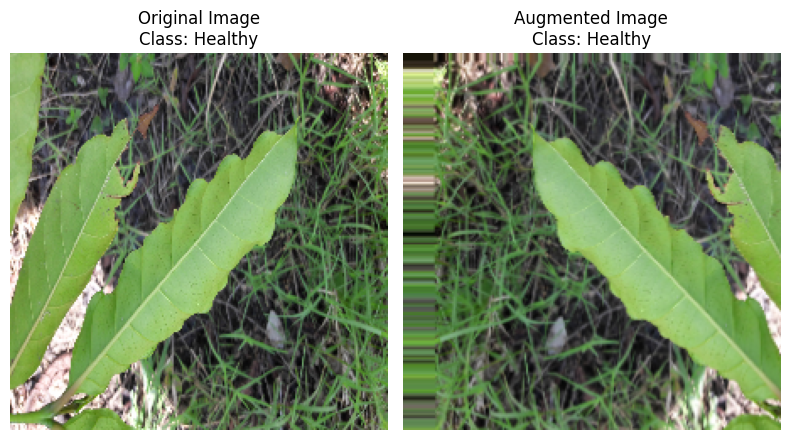

In [7]:
images, labels = next(train_datagen)
augmented_images, augmented_labels = next(train_datagen_augmented)

random_number = random.randint(0, len(images) -1)
print(f"Showing image number: {random_number}")


original_class_name = class_names[labels[random_number].argmax()]
augmented_class_name = class_names[augmented_labels[random_number].argmax()]

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(images[random_number])
plt.title(f"Original Image\nClass: {original_class_name}")
plt.axis(False)

# Plot augmented image
plt.subplot(1, 2, 2)
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented Image\nClass: {augmented_class_name}")
plt.axis(False)

plt.tight_layout()
plt.show()



In [8]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam






num_epochs = 1

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Model definition
model_4 = Sequential([
    Input(shape=(224, 224, 3)), 
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.3),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    BatchNormalization(),
    Dropout(0.3),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(4, activation='softmax')  
])





In [9]:
model_4.compile(optimizer=Adam(0.001),
                loss="categorical_crossentropy",
                metrics=["accuracy"])

In [10]:
history_4 = model_4.fit(
    train_datagen_augmented,
    epochs=num_epochs,
    verbose=1,
    validation_data=valid_datagen,
    steps_per_epoch=len(train_datagen_augmented),
    validation_steps=len(valid_datagen),
    callbacks=[early_stopping, model_checkpoint]
)

c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 19/304 ━━━━━━━━━━━━━━━━━━━━ 22:46 5s/step - accuracy: 0.5036 - loss: 11.7044

c:\Users\dell\Desktop\fruit_detection\fruit_detection\env\Lib\site-packages\PIL\Image.py:3406: DecompressionBombWarning: Image size (108000000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


304/304 ━━━━━━━━━━━━━━━━━━━━ 1817s 6s/step - accuracy: 0.6239 - loss: 9.9211 - val_accuracy: 0.2528 - val_loss: 1.3520


In [ ]:
def plot_loss_curves(history):
   
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    # Plot loss
    plt.figure()
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    
    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

# Call the function to plot
plot_loss_curves(history_4)


In [12]:
import json

with open("training_history_1.json", "w") as f:
    json.dump(history_4.history, f)


In [13]:
with open("training_history_1.json", "r") as f:
    loaded_history = json.load(f)


In [14]:
model_4.save_weights("model_weights_1.weights.h5")



In [15]:
from tensorflow.keras.models import load_model

model_4.load_weights("model_weights_1.weights.h5")


In [16]:
test_data_dir = r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test"

In [ ]:
os.listdir(test_data_dir)

In [ ]:
for dirpath, dirnames, filepaths in os.walk(test_data_dir):
    print(f"There are {len(dirnames)} Directories and their are {len(filepaths)} Images in  {dirpath}" )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
test_datagen = ImageDataGenerator(rescale=1./255)



test_datagenerator = test_datagen.flow_from_directory(directory=test_data_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              shuffle=False,
                                              class_mode="categorical",
                                              seed=42)


In [ ]:
# Evaluate the model on the test dataset
results = model_4.evaluate(test_datagenerator)
test_loss = results[0]
test_accuracy = results[1] * 100  # Convert to percentage

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy:.2f}%")


In [ ]:
model_4.summary()

In [ ]:
from sklearn.metrics import confusion_matrix



y_pred_probs = model_4.predict(test_datagenerator, steps=len(test_datagenerator))  
y_true = test_datagenerator.classes  


y_pred = np.argmax(y_pred_probs, axis=1)


cm = confusion_matrix(y_true, y_pred)


print("Confusion Matrix (NumPy Array):")
print(cm)


plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Blues)


class_names = ["Cerscospora", "Healthy", "Leaf rust", "Phoma"]
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=45)

plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.title("Confusion Matrix")

plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
class_names = ["Cercospora", "Healthy", "Leaf Rust", "Phoma"]
report = classification_report(y_true, y_pred, target_names=class_names)

print("Classification Report:")
print(report)

In [24]:
def predict_images(data, class_names, model, num_images=12, figsize=(10, 6)):
    import matplotlib.pyplot as plt
    import numpy as np
    import tensorflow as tf

    plt.figure(figsize=figsize)

    for i in range(num_images):
        # Get a batch of images and labels
        images, labels = next(iter(data))  
        
        # Randomly select an image from the batch
        id = np.random.randint(len(images))
        img = tf.expand_dims(images[id], axis=0)  # Expand dimensions for prediction

        plt.subplot(3, 4, i + 1)  # Subplot layout: 3 rows, 4 columns
        plt.imshow(images[id])   # Show the selected image

        # Predict the probabilities for the image
        prediction_probs = model.predict(img)[0]
        predicted_index = np.argmax(prediction_probs)
        predicted_label = class_names[predicted_index]
        predicted_confidence = prediction_probs[predicted_index] * 100  # Convert to percentage
        
        # Get the actual label
        actual_label = class_names[np.argmax(labels[id])]

        # Determine the color based on correctness of the prediction
        title_color = "green" if predicted_label == actual_label else "red"

        # Set the title with colored text
        plt.title(
            f"Actual: {actual_label}\n"
            f"Predicted: {predicted_label} ({predicted_confidence:.2f}%)",
            fontsize=10,
            color=title_color  # Set the title color
        )
        plt.axis('off')  # Hide axes

    plt.tight_layout()
    plt.show()

# Call the function with test data



In [ ]:
predict_images(test_datagenerator, class_names, model_4)


In [ ]:
import os
import glob

# Define the pattern for images in subdirectories
path_pattern = r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test/**/*.jpg"

# Debug: Check if the main directory exists
print("Directory exists:", os.path.exists(r"C:\Users\dell\Desktop\archive\ethiopian cofee leaf dataset\test"))

# Use glob to get all matching file paths
filepaths = glob.glob(path_pattern, recursive=True)

# Print the first 10 file paths
print("Found files:", filepaths[:2])



In [ ]:
# Step 1: Ensure test_datagenerator is loaded with test data
# Replace 'test_datagenerator' with your actual test dataset generator
if not 'test_datagenerator' in locals():
    raise ValueError("Test data generator is not defined! Please define it before proceeding.")

# Step 2: Extract true labels
y_true = test_datagenerator.classes  # Ensure this matches your dataset generator's output

# Step 3: Validate lengths
if len(filepaths) != len(y_true):
    raise ValueError("Number of file paths does not match number of true labels!")

# Step 4: Proceed with creating the DataFrame
pred_df = pd.DataFrame({
    "image_path": filepaths,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_conf": y_pred_probs.max(axis=1),
    "y_true_classname": [class_names[i] for i in y_true],
    "y_pred_classname": [class_names[i] for i in y_pred]
})

# Display the DataFrame
print(pred_df)



In [ ]:
pred_df["pred_correct"] = pred_df["y_true"] == pred_df["y_pred"]
pred_df.head()

In [ ]:
top_wrong_pred = pred_df[pred_df["pred_correct"] == False].sort_values("pred_conf", ascending=False)[:100]
top_wrong_pred.head(10)

In [30]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def load_and_prep_image(image_path, target_size=(224, 224), scale=True):
    
    # Load the image with the target size
    img = load_img(image_path, target_size=target_size)
    
    # Convert the image to an array
    img_array = img_to_array(img)
    
    # Optionally scale the pixel values
    if scale:
        img_array = img_array / 255.0
    
    return img_array


In [ ]:
images_to_view = 9
start_index = 0

plt.figure(figsize=(15, 10))

for i, row in enumerate(top_wrong_pred[start_index:start_index + images_to_view].itertuples()):
    plt.subplot(3, 3, i + 1)
    
    # Load and preprocess the image
    img = load_and_prep_image(row.image_path, scale=False)
    
    # Unpack required row values
    _, _, _, _, pred_prob, y_true_classname, y_pred_classname, _ = row
    
    # Display the image
    plt.imshow(img / 255.0)
    plt.title(
        f"""Actual: {y_true_classname}
        Predicted: {y_pred_classname}
        Probability: {pred_prob:.2f}"""
    )
    plt.axis(False)

plt.tight_layout()
plt.show()

